
#Algoritmo Fisher Yates Shuffle

## Concepto

>Es un algoritmo que realiza una permutacion uniforme aleatoria de un arreglo

**¿Por qué una permutación uniforme?**

>Porque viene de uno de los extremos

##¿Dónde se aplica Fisher Yates?

* Realización una baraja
* Selección de una canción aleatoria
* Desorden de letras
* Uso empresarial: Población y muestra en estadísticas

##Ejemplo

Aplicar Fisher Yates a un arreglo con numeros del 0 al 6

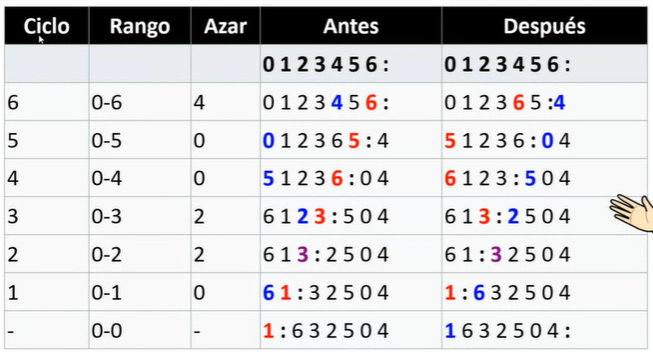

## Pseudocodigo

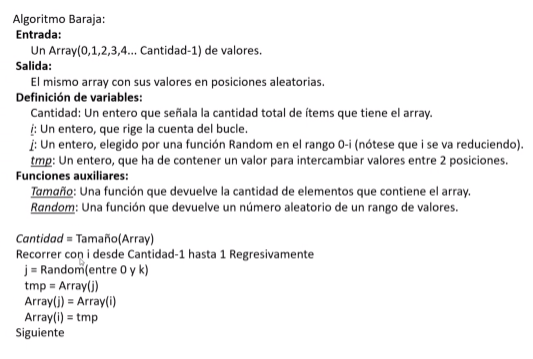

##Implementación en C++ con un areglo de enteros

In [46]:
%%writefile fisheryates_int.cpp

#include <iostream>
#include <time.h>

using namespace std;

void swap(int *a, int *b){
    int temp = *a;
    *a = *b;
    *b = temp;
}

void printArray(int arr[], int n){
    for(int i=0; i<n; i++)
        cout << arr[i] << " ";
    cout << "\n";
}

void randomize(int arr[], int n){
    for(int i=n-1; i>0; i--){
        int j = rand() % (i+1);

        swap(&arr[i], &arr[j]);
    }
}

int main(){
    srand(time(NULL));

    int arr[] = {1, 2, 3, 4, 5, 6, 7, 8, 9};

    //8*4bytes / 1*4bytes
    int n = sizeof(arr) / sizeof(arr[0]);

    cout << "Arreglo ordenado" << endl;
    printArray(arr,n);

    //Desorden
    randomize(arr, n);

    cout << "Arreglo randomizado" << endl;
    printArray(arr, n);

    return 0;
}

Writing fisheryates_int.cpp


In [47]:
!g++ fisheryates_int.cpp && ./a.out

Arreglo ordenado
1 2 3 4 5 6 7 8 9 
Arreglo randomizado
4 1 6 8 7 3 5 2 9 


## Implemetacion Modo C

In [48]:
%%writefile fisheryates_modeC.cpp

#include <stdlib.h>
#include <time.h>
#include <stdio.h>

void swap(int* a, int* b){
    int temp = *a;
    *a = *b;
    *b = temp;
}

void randomize(int* arr, int n){
    for(int i=n-1; i>0; i--){
        int j = rand() % (i+1);
        swap(&arr[i], &arr[j]);
    }
}

void printArray(int* arr, int n){
    for(int i=0; i<n; i++)
      printf("%d", arr[i]);
    printf("\n");
}

int main(){
    srand(time(NULL));

    int arr[] = {1, 2, 3, 4, 5, 6, 7, 8, 9};

    //8*4bytes / 1*4bytes
    int n = sizeof(arr) / sizeof(arr[0]);

    printf("Arreglo ordenado\n");
    printArray(arr,n);

    //Desorden
    randomize(arr, n);

    printf("Arreglo desordenado\n");
    printArray(arr, n);

    return 0;
}

Writing fisheryates_modeC.cpp


In [49]:
!g++ fisheryates_modeC.cpp && ./a.out

Arreglo ordenado
123456789
Arreglo desordenado
896734521


## Implementacion C++ con clase generica Vector (Templates y Lambdas)

> Ahora las funciones se vuelven métodos. Los métodos son propios de POO, mientras que las funciones son propias de la programación estructurada.

> En la programacién estructurada, las funciones dependen de parémetros. Sin embargo, en POO, esos parémetros se vuelven **atributos de clase**

> Los atributos se inicializan en el constructor de la clase, dejando a los métodos únicamente con la funcionalidad

In [50]:
%%writefile fisheryates_generic.cpp

#include <cstdlib>
#include <ctime>
#include <cstdio>
#include <string>
#include <functional>
#include <iostream>

using std::function;
using std::cout;
using std::string;

typedef unsigned long ul;

//Generic: G
template <class G>
class Vector{
    private:
      G* arr;
      long id;
      ul size;

    public:
      Vector(ul size=10) : size(size), id(-1){
          //El id empieza con -1
          //porque se asume que el arreglo empieza vacio
          arr = new G[size];
      }
      ~Vector(){}

      void swap(G* a, G* b){
          G temp = *a;
          *a = *b;
          *b = temp;
      }

      void randomize(){
          for(size_t i=id-1; i>0; i--){
              size_t j = rand() % (i+1);
              swap(&arr[i], &arr[j]);
          }
      }

      //La iteracion es como un print
      //que sirve para cualquier tipo de dato
      //incluyendo estructuras
      void iterate(function<void(G)> func){
          for(int i=0; i<=id; i++)
            func(arr[i]);
          printf("\n");
      }

      void push_back(G value){
          arr[++id] = value;
      }
};

struct Numero{
    short entera;
    short decimal;
    Numero(short entera=0, short decimal=0) : entera(entera), decimal(decimal){}
};

int main(){
    srand(time(NULL));

    //Tipo de dato primitivo
    printf("Fisher Yates en un vector generico de tipo enteros\n");
    Vector<int> vEnteros(10);
    for(size_t i=0; i<10; ++i){
        vEnteros.push_back(i);
    }

    vEnteros.iterate([](int v){printf("%d", v);});
    vEnteros.randomize();
    vEnteros.iterate([](int v){printf("%d", v);});
    printf("\n");

    //-----------------------

    //Tipo de dato compuesto
    printf("Fisher Yates en un vector generico de tipo de dato compuesto\n");
    Vector<Numero> vNumeros(5);
    for(size_t i=0; i<5; ++i){
        /*i: parte entera
        random: parte decimal*/
        vNumeros.push_back(Numero(i, rand()%10));
    }
    vNumeros.iterate([](Numero v){printf("(%d,%d)", v.entera, v.decimal);});
    vNumeros.randomize();
    vNumeros.iterate([](Numero v){printf("(%d,%d)", v.entera, v.decimal);});
    printf("\n");

    //-------------------------

    //Tipo de dato string
    printf("Fisher Yates en un vector generico de tipo string\n");
    Vector<string> vStrings(5);
    vStrings.push_back("Adela");
    vStrings.push_back("Beatriz");
    vStrings.push_back("Carolina");
    vStrings.push_back("Daniel");
    vStrings.push_back("Fidel");

    vStrings.iterate([](string v){cout<<v<<std::endl;});
    vStrings.randomize();
    vStrings.iterate([](string v){cout<<v<<std::endl;});

    return 0;
}

Overwriting fisheryates_generic.cpp


In [51]:
!g++ fisheryates_generic.cpp && ./a.out

Fisher Yates en un vector generico de tipo enteros
0123456789
0563128479

Fisher Yates en un vector generico de tipo de dato compuesto
(0,6)(1,9)(2,3)(3,7)(4,0)
(0,6)(1,9)(3,7)(2,3)(4,0)

Fisher Yates en un vector generico de tipo string
Adela
Beatriz
Carolina
Daniel
Fidel

Daniel
Adela
Carolina
Beatriz
Fidel

